# CNN (emotion_classifier) 모델 사용해서 celeba 분류

In [2]:
import os
import sys
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
from google.colab.patches import cv2_imshow

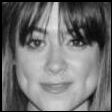

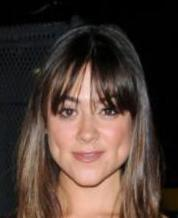

-1

In [18]:
# Read the input image
img = cv2.imread('/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/StarGAN/data/celeba/images/000062.jpg')
  
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Load the cascade
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/haarcascade/haarcascade_frontalface_alt2.xml')
  
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
  
# Draw rectangle around the faces and crop the faces
for (x, y, w, h) in faces:
    cv2.rectangle(gray, (x, y), (x+w, y+h), (0, 0, 255), 2)
    faces = gray[y:y + h, x:x + w]
    cv2_imshow(faces)
    cv2.imwrite('face.jpg', faces)
      
# Display the output
cv2.imwrite('detcted.jpg', img)
cv2_imshow(img)
cv2.waitKey()

In [7]:
# 학습시켜놓은 CNN 모델 불러오기
model = load_model('/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/CNN/model/cnn_e-17.h5')

# class name
# 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)
# cls_index = [0, 1, 2, 3, 4, 5, 6]

test_img_dir = '/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/StarGAN/data/celeba/images'
images = os.listdir(test_img_dir)

In [8]:
# Load the cascade
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/haarcascade/haarcascade_frontalface_alt2.xml')

for image_file_name in images:
    try:
        # 이미지 불러오기 경로지정
        ori_image = cv2.imread('/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/StarGAN/data/celeba/images/' + image_file_name, cv2.IMREAD_COLOR)
        	
        # 모델 학습시 grayscale로 했기 때문에 변환해서 예측
        image = cv2.cvtColor(ori_image, cv2.COLOR_BGR2GRAY) 
        
        # Detect faces
        faces = face_cascade.detectMultiScale(image, 1.1, 4)
        
        # Draw rectangle around the faces and crop the faces
        for (x, y, w, h) in faces:
            # cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
            crop_img = image[y:y + h, x:x + w]
            crop_img = cv2.resize(crop_img, dsize=(48, 48), interpolation=cv2.INTER_CUBIC)
            # cv2_imshow(crop_img)
            crop_img = crop_img.astype('float32') / 255.
            crop_img = crop_img.reshape(-1, 48, 48, 1)
            print(crop_img.shape)
            break

        # pants 예측
        result = model.predict(crop_img)
        print(result)
        result_classes = np.argmax(result, axis=-1)
        print(result_classes[0])
        print(f'예측: {result_classes[0]} {100 * max(result[0])}')

        # Save output
        ### 결과 저장 경로 지정
        test_file_name = '/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/CNN/celebA_result/test/' + \
                        str(result_classes[0]) + "/{}".format(image_file_name)
        print(test_file_name)
        cv2.imwrite(test_file_name, ori_image)

        # 예측 확률 70% 이상인 경우 예측 클래스로 분류. 70% 미만은 etc로 분류.
        # if max(result[0]) * 100 >= 70:
        #     test_file_name = '/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/CNN/celebA_result/train/' + \
        #                     str(result_classes[0]) + "/{}".format(image_file_name)
        #     print(test_file_name)
        #     cv2.imwrite(test_file_name, ori_image)
        # else:
        #     test_file_name = '/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/CNN/celebA_result/train/' + "etc/{}".format(
        #         image_file_name)
        #     cv2.imwrite(test_file_name, ori_image)


    except Exception as e:
        print("image didn't be saved")
        print(str(e))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
예측: 3 99.94446635246277
/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/CNN/celebA_result/test/3/092744.jpg
(1, 48, 48, 1)
1/1 [==============================] - 0s 50ms/step
[[2.4540016e-06 5.2014886e-09 5.1941479e-05 9.9833703e-01 1.0059952e-04
  4.9412400e-05 1.4585900e-03]]
3
예측: 3 99.83370304107666
/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/CNN/celebA_result/test/3/011995.jpg
(1, 48, 48, 1)
1/1 [==============================] - 0s 70ms/step
[[2.68389890e-03 2.80499771e-05 7.21301767e-05 8.16159725e-01
  1.41547183e-02 1.04991836e-04 1.66796505e-01]]
3
예측: 3 81.6159725189209
/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/CNN/celebA_result/test/3/192258.jpg
(1, 48, 48, 1)
1/1 [==============================] - 0s 57ms/step
[[7.8036678e-03 2.3808921e-06 7.7384911e-03 3.3434838e-01 8.1073508e-02
  8.0065965e-04 5.6823295e-01]]
6
예측: 6 56.82329535484314
/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/CNN/celebA_result/test/6/124274.jpg

# 전처리 (crop) 
(얼굴 256 X 256)

In [7]:
# import os

# def createDirectory(directory):
#     try:
#         if not os.path.exists(directory):
#             os.makedirs(directory)
#     except OSError:
#         print("Error: Failed to create the directory.")

In [9]:
# Load the cascade
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/haarcascade/haarcascade_frontalface_alt2.xml')

test_img_dir = '/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/CNN/celebA_result/test'

for i in range(7):  # 하위 폴더 명이 0~6임
    image_path = test_img_dir + "/" + str(i)

    images = os.listdir(image_path)

    for image_file_name in images:
        try:
            # 이미지 불러오기 경로지정
            ori_image = cv2.imread(image_path + '/' + image_file_name, cv2.IMREAD_COLOR)
                
            # grayscale로 변환
            image = cv2.cvtColor(ori_image, cv2.COLOR_BGR2GRAY) 
            
            # Detect faces
            faces = face_cascade.detectMultiScale(image, 1.1, 4)
            
            # Draw rectangle around the faces and crop the faces
            for (x, y, w, h) in faces:
                # cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
                crop_img = ori_image[y:y + h, x:x + w]
                crop_img = cv2.resize(crop_img, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
                break

            # Save output
            ### 결과 저장 경로 지정
            test_file_name = '/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/CNN/celebA_result/test_crop/'+ str(i) + \
                            "/{}".format(image_file_name)
            print(test_file_name)
            cv2.imwrite(test_file_name, crop_img)

        except Exception as e:
            print("image didn't be saved")
            print(str(e))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/CNN/celebA_result/test_crop/5/034345.jpg
/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/CNN/celebA_result/test_crop/5/133944.jpg
/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/CNN/celebA_result/test_crop/5/141692.jpg
/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/CNN/celebA_result/test_crop/5/045844.jpg
/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/CNN/celebA_result/test_crop/5/118999.jpg
/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/CNN/celebA_result/test_crop/5/156016.jpg
/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/CNN/celebA_result/test_crop/5/051455.jpg
/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/CNN/celebA_result/test_crop/5/133250.jpg
/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/CNN/celebA_result/test_crop/5/023398.jpg
/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/CNN/celebA_result/test_crop/5/135090.jpg
/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/CNN/